# 1.7 Network graph visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('alice_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,Alice,Rabbit,90
1,Alice,Duchess,229
2,Alice,Mouse,110
3,Dodo,Mouse,10
4,Dodo,Lory,6
5,Eaglet,Lory,6
6,Alice,Eaglet,5
7,Alice,Lory,28
8,Lory,Mouse,29
9,Duck,Mouse,9


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

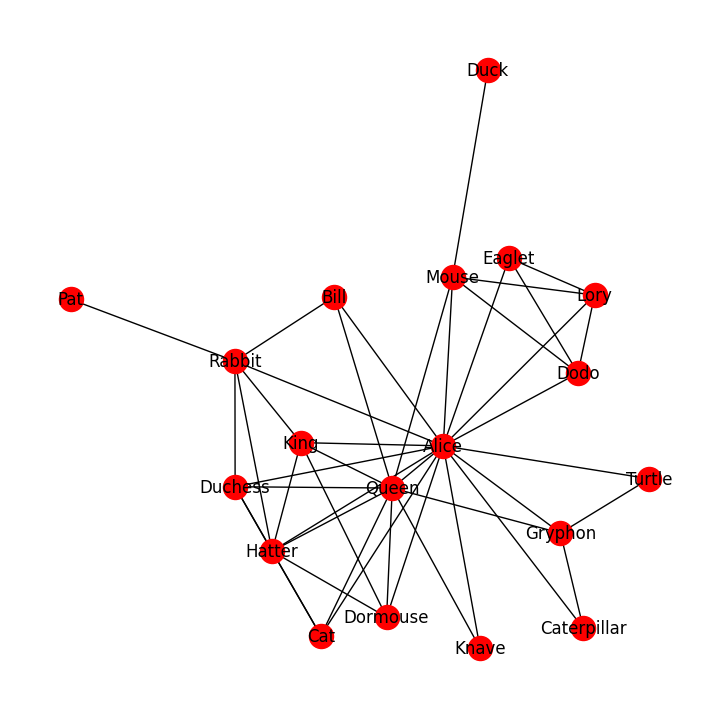

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_alice.png')

#### Graph visualization - Pyvis

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("alice.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection - Leiden algorithm

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com

defaultdict(list,
            {'Rabbit': [0],
             'Duchess': [0],
             'Pat': [0],
             'Bill': [0],
             'Queen': [0],
             'Cat': [0],
             'Hatter': [0],
             'Dormouse': [0],
             'King': [0],
             'Mouse': [1],
             'Dodo': [1],
             'Lory': [1],
             'Eaglet': [1],
             'Duck': [1],
             'Alice': [2],
             'Caterpillar': [2],
             'Knave': [2],
             'Gryphon': [2],
             'Turtle': [2]})

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com

{'Rabbit': 0,
 'Duchess': 0,
 'Pat': 0,
 'Bill': 0,
 'Queen': 0,
 'Cat': 0,
 'Hatter': 0,
 'Dormouse': 0,
 'King': 0,
 'Mouse': 1,
 'Dodo': 1,
 'Lory': 1,
 'Eaglet': 1,
 'Duck': 1,
 'Alice': 2,
 'Caterpillar': 2,
 'Knave': 2,
 'Gryphon': 2,
 'Turtle': 2}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("alice_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### The most important characters in Alice in Wonderland

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Alice': 0.8888888888888888,
 'Rabbit': 0.3333333333333333,
 'Duchess': 0.2777777777777778,
 'Mouse': 0.2777777777777778,
 'Dodo': 0.2222222222222222,
 'Lory': 0.2222222222222222,
 'Eaglet': 0.16666666666666666,
 'Duck': 0.05555555555555555,
 'Pat': 0.05555555555555555,
 'Bill': 0.16666666666666666,
 'Caterpillar': 0.1111111111111111,
 'Queen': 0.5555555555555556,
 'Cat': 0.2222222222222222,
 'Hatter': 0.38888888888888884,
 'Dormouse': 0.2222222222222222,
 'Knave': 0.1111111111111111,
 'Gryphon': 0.2222222222222222,
 'Turtle': 0.1111111111111111,
 'King': 0.2777777777777778}

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

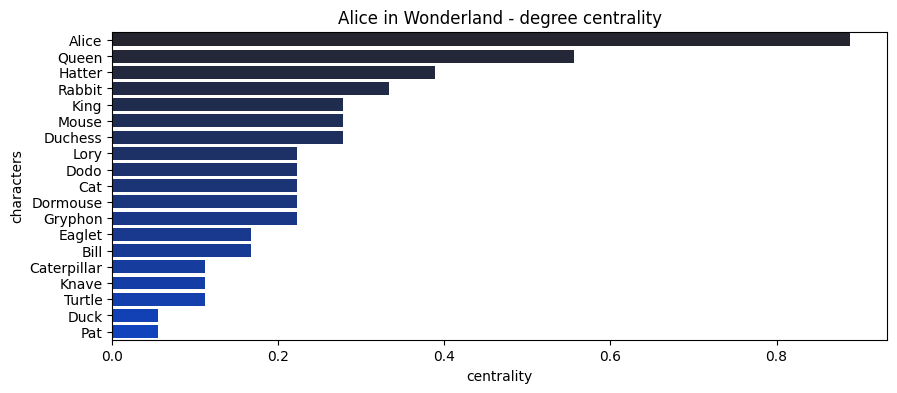

In [18]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Alice in Wonderland - degree centrality")

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [20]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

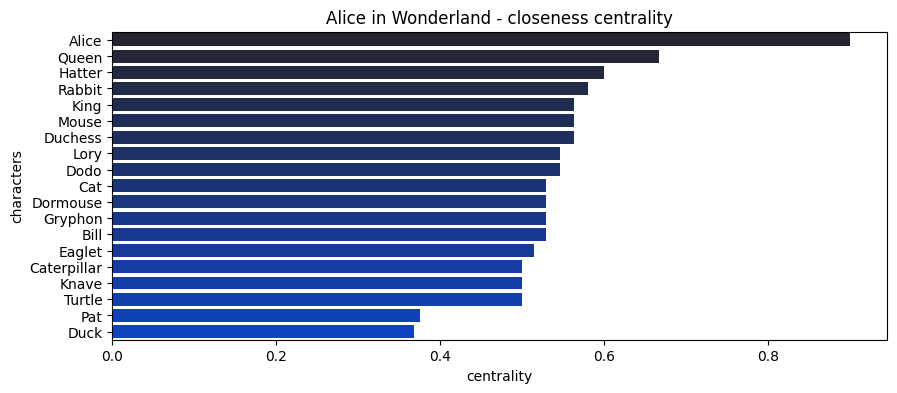

In [21]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Alice in Wonderland - closeness centrality")

In [22]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [23]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

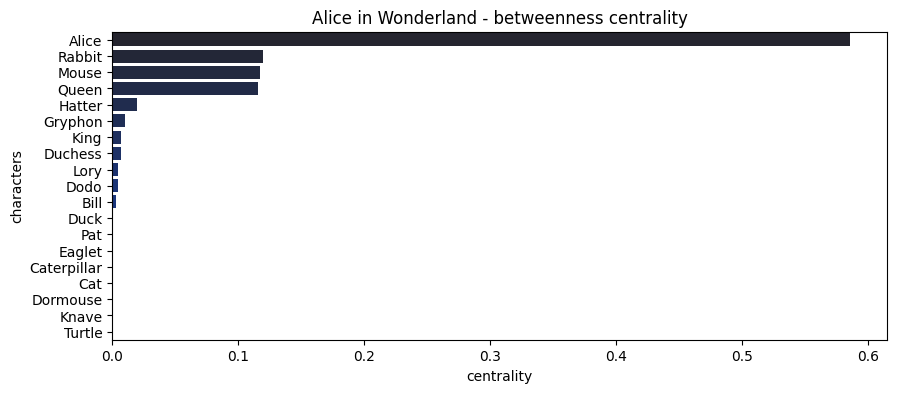

In [24]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Alice in Wonderland - betweenness centrality")

In [25]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')